# Problem statement

To predict Breast Cancer whether the cancer is benign or malignant Using Machine Learning Algorithms.

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Reading dataset

In [4]:
import pandas as pd
A=pd.read_csv("C:/Users/Admin/Desktop/ETL class/Project/Breast cancer/breast cancer.csv")


pd.set_option('display.max_columns', None) # maximize the display value of column
pd.set_option('display.max_rows', None)

In [5]:
A.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Missing Data Treatment

In [6]:
from PM8wd import replacer
replacer(A)

# Define X and Y

In [7]:
Y=A[["diagnosis"]]     
X=A.drop(labels=["diagnosis","id"],axis=1)

# Divide data in categorical and continuous

In [8]:
cat=[]
con=[]
for i in X.columns:
    if (X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [9]:
cat   #In our dataset cat column not present so it is empty.

[]

In [10]:
con

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

# EDA

In [11]:
A.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:xlabel='diagnosis', ylabel='concavity_mean'>

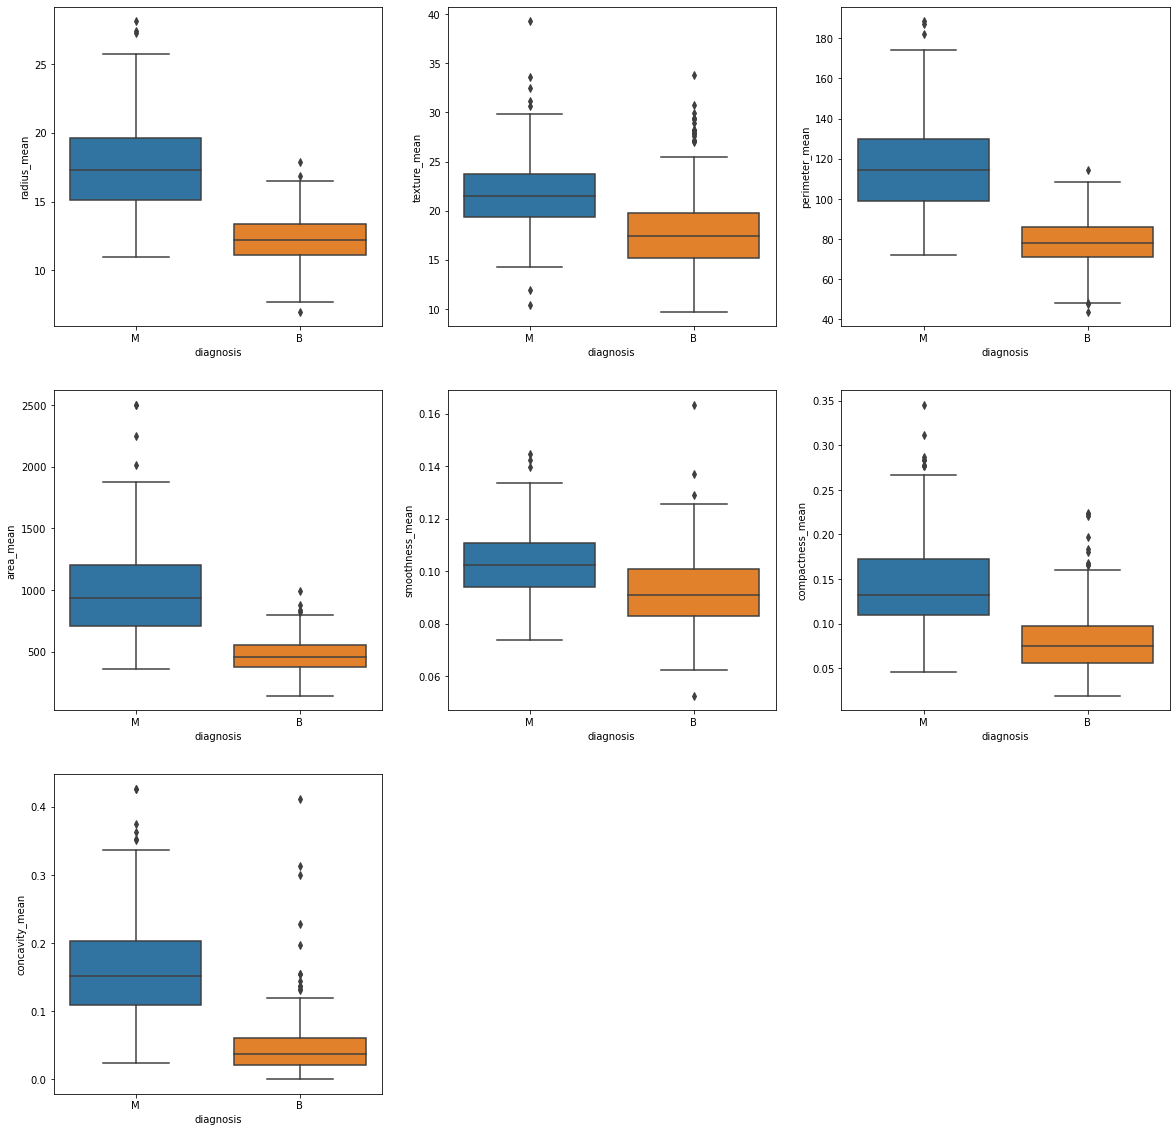

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt                              #  here Y(cat) and X(con),so we appied boxplot.
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sb.boxplot(A.diagnosis,A.radius_mean)

plt.subplot(3,3,2)
sb.boxplot(A.diagnosis,A.texture_mean)

plt.subplot(3,3,3)
sb.boxplot(A.diagnosis,A.perimeter_mean)

plt.subplot(3,3,4)
sb.boxplot(A.diagnosis,A.area_mean)

plt.subplot(3,3,5)
sb.boxplot(A.diagnosis,A.smoothness_mean)

plt.subplot(3,3,6)
sb.boxplot(A.diagnosis,A.compactness_mean)

plt.subplot(3,3,7)
sb.boxplot(A.diagnosis,A.concavity_mean)

# Standardize the data

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
#X2 = pd.get_dummies(X[cat])
Xnew = X1

# Finding outliers

In [14]:
outliers = []
for i in con:
    outliers.extend(Xnew[(Xnew[i] > 3) | (Xnew[i] < -3)].index)    #  we find outliers grea than +3 and less than -3

Xnew = Xnew.drop(labels=outliers,axis=0)                           #here we dropped rows containing outliers.
Y = Y.drop(labels=outliers,axis=0)

In [15]:
outliers

[82,
 180,
 212,
 352,
 461,
 219,
 232,
 239,
 259,
 82,
 122,
 180,
 212,
 352,
 461,
 521,
 82,
 122,
 180,
 212,
 339,
 352,
 461,
 521,
 3,
 105,
 122,
 504,
 568,
 0,
 3,
 78,
 82,
 108,
 122,
 181,
 258,
 567,
 78,
 82,
 108,
 122,
 152,
 202,
 352,
 461,
 567,
 82,
 108,
 122,
 180,
 352,
 461,
 25,
 60,
 78,
 122,
 146,
 3,
 71,
 152,
 318,
 376,
 504,
 505,
 122,
 138,
 212,
 258,
 417,
 461,
 503,
 12,
 83,
 122,
 192,
 416,
 473,
 557,
 559,
 561,
 12,
 108,
 122,
 212,
 258,
 417,
 461,
 503,
 122,
 212,
 265,
 368,
 461,
 503,
 71,
 116,
 122,
 213,
 314,
 345,
 505,
 12,
 42,
 68,
 71,
 108,
 122,
 152,
 176,
 190,
 213,
 288,
 290,
 68,
 112,
 122,
 152,
 213,
 376,
 12,
 68,
 152,
 213,
 288,
 389,
 3,
 42,
 78,
 119,
 122,
 138,
 146,
 190,
 212,
 314,
 351,
 12,
 71,
 112,
 151,
 152,
 176,
 213,
 290,
 376,
 388,
 180,
 236,
 265,
 352,
 461,
 503,
 219,
 239,
 259,
 265,
 82,
 180,
 265,
 352,
 461,
 503,
 23,
 180,
 236,
 265,
 339,
 352,
 368,
 461,
 503,
 521,
 

In [16]:
Xnew.shape

(495, 30)

In [17]:
Y.shape

(495, 1)

# Divide data training and testing set

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Model

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [20]:
pred   #predicted values

array(['B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B'], dtype=object)

In [21]:
ytest

,diagnosis
448,B
89,B
6,M
221,B
282,M
435,M
496,B
153,B
337,M
526,B


In [22]:
Q=ytest[["diagnosis"]]
Q["Predicted_diagnosis"]=pred    #here we adding one column--->"Predicted_diagnosis" and name will be give from pred.  

In [23]:
Q

,diagnosis,Predicted_diagnosis
448,B,B
89,B,B
6,M,M
221,B,B
282,M,M
435,M,B
496,B,B
153,B,B
337,M,M
526,B,B


# Here we are finding accuracy score and confusion matrix.

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.9090909090909091

In [25]:
import seaborn as sb
import matplotlib.pyplot as plt

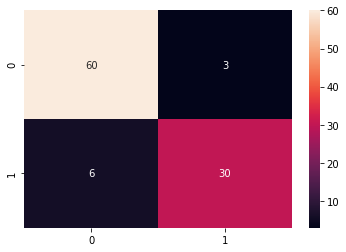

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,pred) 
sb.heatmap(cm,annot=True)
plt.show()

  60 and 30 is true values                         
  6 and 3 is false values  
  
  30---->B(benign) predicted as B(benign)                    
  60---->M(malignant) predicted as M(malignant)                  
  
  3---->B(benign) predicted as M(malignant)               
  6---->M(malignant) predicted as B(benign)                        

# Fining accuracy score using RandomForestClassifier

In [27]:
from sklearn.ensemble  import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,max_depth=3)
model = rfr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),2)
ts_acc = round(accuracy_score(ytest,pred_ts),2)

In [28]:
tr_acc

0.98

In [29]:
ts_acc

0.92

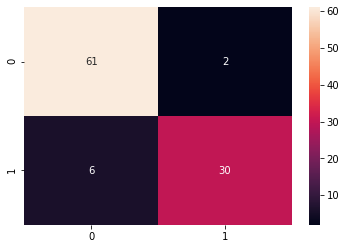

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,pred_ts) 
sb.heatmap(cm,annot=True)
plt.show()

# Fining accuracy score using KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
model = knc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),2)
ts_acc = round(accuracy_score(ytest,pred_ts),2)

In [32]:
tr_acc

0.98

In [33]:
ts_acc

0.95

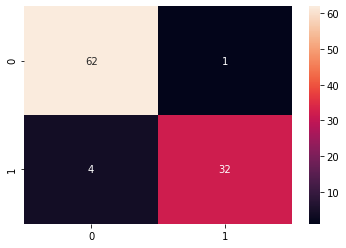

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,pred_ts) 
sb.heatmap(cm,annot=True)
plt.show()

After training all the algorithms , we found that KNN, Decision Tree Classification , Random Forest Classification Model have high accuracy. From them we choose the KNN Model as it gives the highest accuracy.